# K47_T1_001_rawClover_crystal_02.txt

In [1]:
using Plots, DelimitedFiles,LsqFit

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

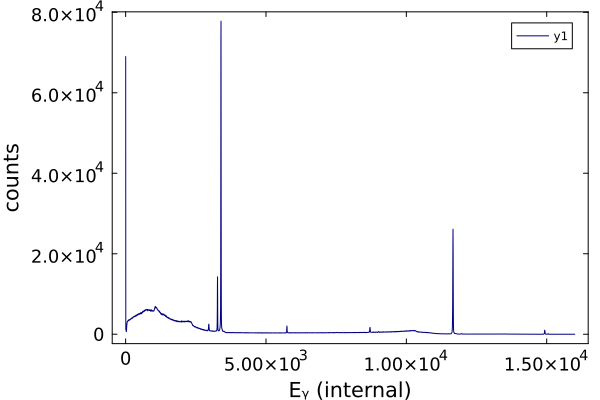

In [89]:
crystal2raw=readdlm("data/K47_T1_001_rawClover_crystal_02.txt",',')

plot(crystal2raw[:,1],crystal2raw[:,2])

## Identified Peaks

In [ ]:
xlow,xhigh = 3200,3300
param = [100,0.05,2e5,3250,5]

### Peak 1 [3225,3325]

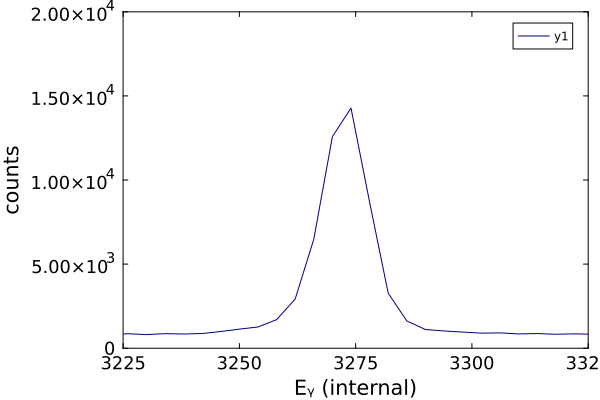

In [88]:
plot(crystal2raw[:,1],crystal2raw[:,2],xlims=(3225,3325),ylims=(0,2.0e4))

`param = [background-constant, background-slope, area1,mean1,sigma1]`

P1 = 3986.31170896515(4964.046030139096)
P2 = -0.9171838860619248(1.51589706658308)
P3 = 171730.83340016176(2643.3400524420013)
P4 = 3272.681877353408(0.07747465206065672)
P5 = 5.074780390404801(0.08166452218386988)


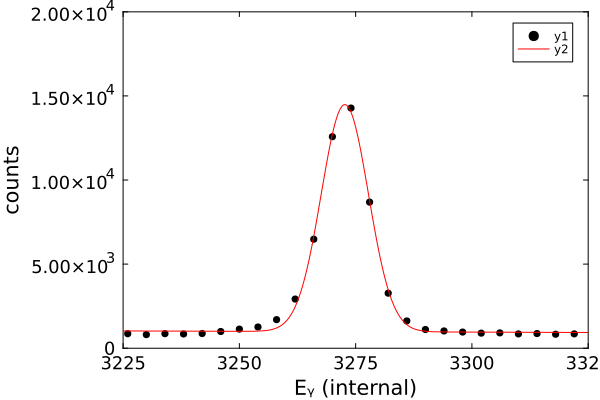

In [90]:
x2low,x2high = 3225,3325
peak2_mean = 3270
param2 = [100,0.05,2e5,peak2_mean,5]

p564,s564,f=PhotopeakFit.gaussianfit(crystal2raw,x2low,x2high,param2)

for (i,val) in enumerate(p564)
    println("P$i = ",val,"($(s564[i]))")
end

scatter(crystal2raw[:,1],crystal2raw[:,2],xlims=(x2low,x2high),ylims=(0,2e4))
plot!(e->f(e,p564),x2low,x2high,lc=:red)

### Peak 3 [3355,3440]

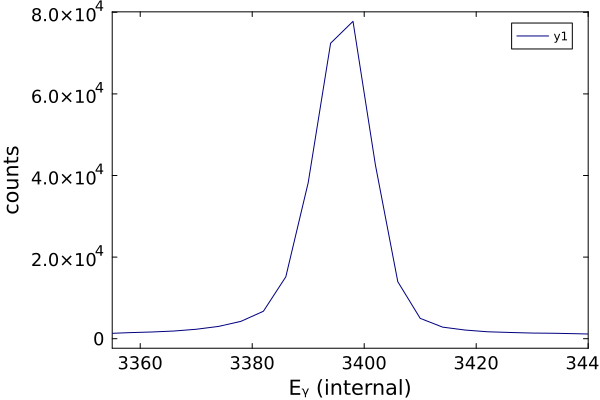

In [56]:
plot(crystal2raw[:,1],crystal2raw[:,2],xlims=(3355,3440))

P1 = 61501.0103342436(37074.820344938955)
P2 = -17.420747651744584(10.89858433703596)
P3 = 999298.7879886389(16098.756212032042)
P4 = 3396.2499430255257(0.079128801137561)
P5 = 5.095479413582658(0.08426144113165783)


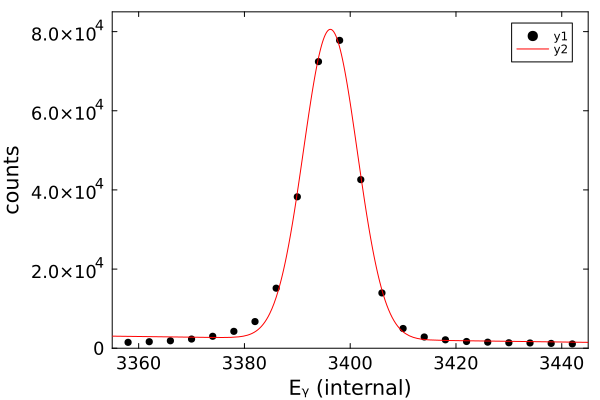

In [92]:
x3low,x3high = 3355,3445
peak3_mean = 3395
param3 = [100,0.05,2e5,peak3_mean,5]

p586,s586,f=PhotopeakFit.gaussianfit(crystal2raw,x3low,x3high,param3)

for (i,val) in enumerate(p586)
    println("P$i = ",val,"($(s586[i]))")
end

scatter(crystal2raw[:,1],crystal2raw[:,2],xlims=(x3low,x3high),ylims=(0,8.5e4))
plot!(e->f(e,p586),x3low,x3high,lc=:red)

### Peak 4 [1.15e4,1.182e4]

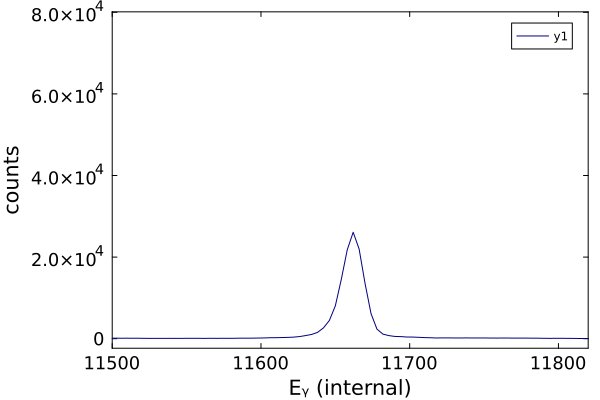

In [36]:
plot(crystal2raw[:,1],crystal2raw[:,2],xlims=(1.15e4,1.182e4))

P1 = 27214.23458542767(34027.10146037768)
P2 = -2.287049158110641(2.918461533043309)
P3 = 462123.03177708946(8393.433871506084)
P4 = 11661.666727467906(0.1286090114572029)
P5 = 7.411442499382519(0.13732581370280694)


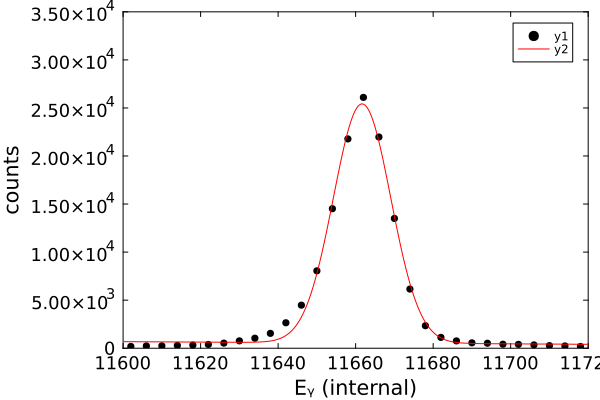

In [93]:
x4low,x4high = 1.16e4,1.172e4
peak4_mean = 1.165e4
param4 = [100,0.05,2e5,peak4_mean,5]

p2013,s2013,f=PhotopeakFit.gaussianfit(crystal2raw,x4low,x4high,param4)

for (i,val) in enumerate(p2013)
    println("P$i = ",val,"($(s2013[i]))")
end

scatter(crystal2raw[:,1],crystal2raw[:,2],xlims=(x4low,x4high),ylims=(0,3.5e4))
plot!(e->f(e,p2013),x4low,x4high,lc=:red)

# Energy Calibration

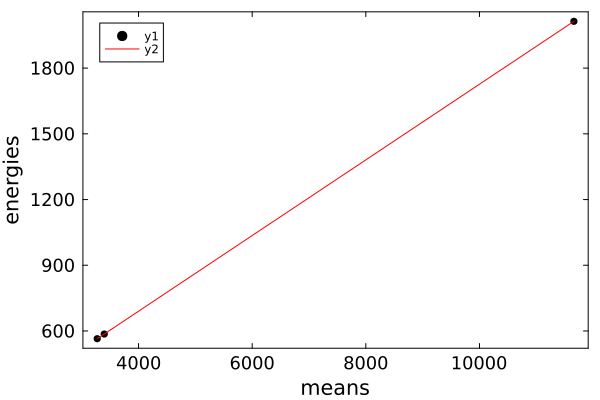

In [96]:
energies = [564.79,586.01,2013.45]; means=[p564[4],p586[4],p2013[4]]

scatter(means,energies,xlabel="means",ylabel="energies")

@. linearfit(e,p)=p[1]+p[2]*e

fitcrystal2=curve_fit(linearfit,means,energies,[500,0.15])

scatter(means,energies,xlabel="means",ylabel="energies")
plot!(e->linearfit(e,fitcrystal2.param),lc=:red)

### Residuals

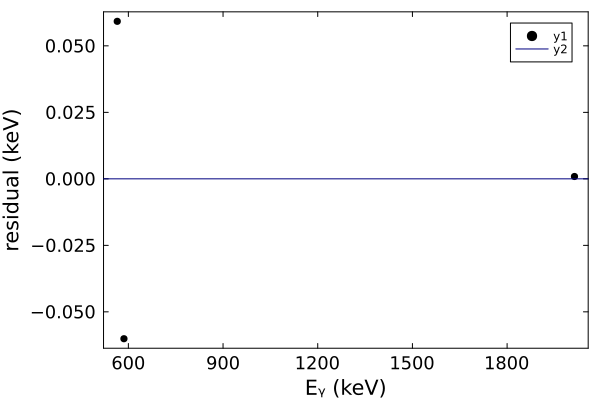

In [97]:
residuals = energies .- ( fitcrystal2.param[1] .+ means .* fitcrystal2.param[2] )

scatter(energies,residuals,xlabel="Eᵧ (keV)",ylabel="residual (keV)")
hline!([0])

### Calibrated Histogram

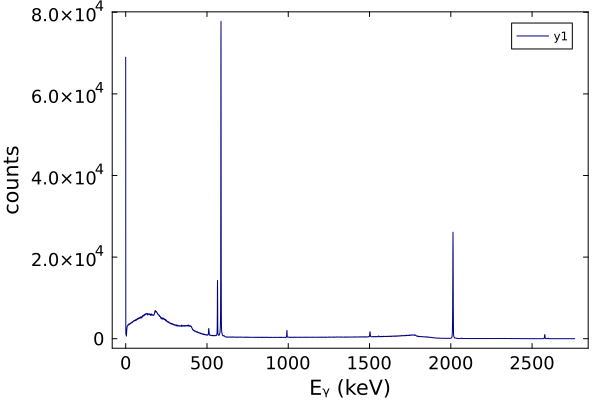

In [98]:
crystal2calibrated = [ fitcrystal2.param[1].+crystal2raw[:,1].*fitcrystal2.param[2] crystal2raw[:,2] ] 

plot(crystal2calibrated[:,1],crystal2calibrated[:,2],xlabel="Eᵧ (keV)")